# End-to-End Machine Learning Project

## Oveview

This notebook is about building an end-to-end Machine Learning (ML) project showing the main steps that should be always addressed (or implemented) when using an ML-based solution. During this session we will focus mainly on the breast cancer wisconsin (diagnostic) data set. This dataset includes 30 features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The features describe characteristics of cell nuclei present in the image. The goal is to use these features to determine if the sample is benign or malignant (M = malignant, B = benign).

### Agenda

1.	[Load a dataset and understand the problem at hand.](#section_1)
2.	[Data cleaning](#section_2)
3.	[Use statistical summaries and visualize the data to gain insights.](#section_3) 
4.  [Splitting the dataset into training and test sets](#section_4) 
5.	[Feature scaling](#section_5) 
6.  [Train and evaluate models](#section_6) 
7.	[Fine-tune promising models](#section_7) 
8.  [Evaluate the best selected model on the test set](#section_8) 

## More information on the Breast Cancer Wisconsin data set
*When starting an ML project the first thing to do is to forget about the ML process. We need to get familiar with the computational problem we want to solve by using ML.*

The following figure includes sample images derived from breast biopsies. Images on the left belong to patients who were diagnosed with benign tumors and images on the right belong to patients who were diagnosed with malignant tumors.

<img src="PS1/Img/fig_breast_cancer_cr.png"/>

*Author: Max Pechyonkin. Figure retrieved from https://pechyonkin.me/portfolio/breast-cancer-diagnostics/#fn:7*
 
In order to diagnose whether a tumor is malignant or benign is to take a biopsy of a breast mass and then a technician will 'manually' examine cell nuclei under a microscope. A trained specialist can then decide based on what he/she observes if there is cancer or not. 

The Breast Cancer Wisconsin data set contains 569 observations across 32 attributes. The attribute set includes the patient ID number, the diagnosis (malignant or benign) and 30 real-valued numerical variables derived from 10 features which are extracted from the images. 

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension (“coastline approximation” - 1)


For each of the 10 features, there are 3 numerical variables, representing the mean, the standard error of the mean and the “worst” (mean of three largest values).

A brief description of these features can be found here https://pechyonkin.me/portfolio/breast-cancer-diagnostics/#fn:7. While, the original paper describing them is the following. 

*Street, W. Nick, William H. Wolberg, and Olvi L. Mangasarian. "Nuclear feature extraction for breast tumor diagnosis." Biomedical image processing and biomedical visualization. Vol. 1905. International Society for Optics and Photonics, 1993.*


https://medium.com/data-science-365/building-a-machine-learning-model-on-cancer-data-cd42c56721f4

## 0. Prepare the toolbox

This tutorial assumes Python version 3.6+. 

There are 5 key libraries that you will need to install. 

In [3]:
# Set jupyter plot backend before loading libraries
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import sklearn as mlb
import matplotlib.pyplot as plt
import seaborn as sns

If you want to learn more about the individual modules; from *DataCamp*:
* **Pandas**: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
* **Numpy**: https://www.datacamp.com/community/tutorials/python-numpy-tutorial
* **Matplotlib**: https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python
* **Seaborn**: https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

<a id="section_1"></a>
## 1. Load the data and understand the problem at hand
### Frame the problem

The first questions we need to answer before we start:

* **Do I have to address a supervised, unsupervised, or reinforcment learning?**

* **Is it a classification task, a regression task, or something else?**

[//]: # "*Before you read on, pause and try to answer these questions for yourself.*"

It’s time to get our hands dirty.

*After gathering information on the problme we want to solve ... we need to collect (upload) the observations.*

In this step we are going to

* Load the dataset by using Pandas
* Check the content and the dimensions of the dataset.
* Get a statistical summary of all attributes.

###  Load the data set

First of all, we need to load the data set which is available from KAGGLE as .csv file (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

Make sure to save the .csv file in the current working directory.

To check the current working directory we can use use the module *os*

In [3]:
import os
print(os.getcwd())

/Users/vittfo/Documents/GitHub/MOA1


After saving the *.csv* file, we can load it up by using the function *read_csv* with help of "Pandas". 

In [4]:
data = pd.read_csv('PS1/data.csv')

With Pandas the .csv file is transformed to a data structure called *dataframe*. 

A *dataframe* is a 2-dimensional labeled data structure with columns of potentially different types.

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html offers a short introduction to pandas.

*Dataframes* are not the only available data structure in Python.

Here is a recap of Python data structures that are used in data analytics.

* Basic data types: List, dict, tuple, set and string.
* N-dimensional arrays (Numpy), which can be used to define vectors and matrices. 
* Dataframe and series (Pandas).

Further information on data structures is available at http://www.grapenthin.org/teaching/geop501/lectures/lecture_06_data_structures.pdf

### Take a quick look at the data structure


Using the DataFrame’s head() method we can visualize the first few rows. We can give the number of rows as a parameter or omit it to print the first 5.

In [5]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Another important method is *info()* which gives a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Dimensions of Dataset

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [7]:
print(data.shape)

(569, 33)


Note! In the above code **shape** is a property of the dataframe **data** that is accessed with ".".

### Class Distribution

We can also check how many diagnosis are malignant (M) and how many are benign (B) with the *value_counts()* method.

In [8]:
diagnosis_all = data.shape[0]
diagnosis_categories = data['diagnosis'].value_counts()
print(diagnosis_categories)
print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                            diagnosis_categories['M'], 
                                                                            diagnosis_categories['B']))

B    357
M    212
Name: diagnosis, dtype: int64

 	 The data has 569 diagnosis, 212 malignant and 357 benign.


<a id="section_2"></a>
## 2. Data cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s learn how to detect and remove missing variables or impute missing values. 

Are there any missing values?

In [9]:
data = pd.read_csv('PS1/data.csv')
data.isnull().values.any() #check for missing variables

True

In [10]:
data.isnull().sum().sum()

569

Can you spot the missing variable form the data.info() printed in the previous section? 

In [11]:
#data.columns[32]
data['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

When loading the data set, an extra column was created, which looks empty.

Moreover, there is another unnecessary extra column namely *id*

In [12]:
data.columns[0]

'id'

We can use the drop method to delete unneeded columns.

In [13]:
data.drop(data.columns[[0, 32]], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In many cases we have only a few missing values for a given variable. 

If the percentage of the missing values is relatively small (e.g. less than 30%) then we may want to keep the variable and *impute* the missing values.

Let's see a simple example of imputation

In [14]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2, 3], [2, 3, 4]])
print(imp.statistics_)
X = imp.transform([[4, np.nan, 6], [5, 6, np.nan]])
print(X)

[1.5 2.5 3.5]
[[4.  2.5 6. ]
 [5.  6.  3.5]]


Question why do we need to fit?

More information on imputing missing values are available here
https://scikit-learn.org/stable/modules/impute.html#:~:text=Missing%20values%20can%20be%20imputed,for%20different%20missing%20values%20encodings.&text=%3E%3E%3E%20import%20numpy%20as%20np%20%3E%3E%3E%20from%20sklearn.

<a id="section_3"></a>
## 3. Use statistical summaries and visualize the data to gain insights

So far we have only taken a quick glance at the data to get a general understanding of the kind of data we are manipulating. Now the goal is to go a little bit more in depth. It is usually a good idea to perform an exploratory analysis to get an idea about what the data "looks like".

### Statistical summaries

The **describe** method shows a summary of the numerical attributes

In [15]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- Mean: mathematical average of all terms.
- Standard deviation: is a measure of how dispersed the data is in relation to the mean.
- Percentiles: the value below which a percentage of data falls.

Do we have features that can dominate others in magnitude?
DO we need to scale the data?

### Visualize the data

Statistical summaries offer a rather simplistic view of the data. Visualizations are often used to intuitively understand the distribution of the data. 

### Histograms

Plot all values on a frequency graph (showing how often they occur).

To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. 

Histograms can be used to visualize the distribution of continuous data/features. They are often utilized to reveal properties about our sample data. While summary statistics, such as the mean and standard deviation, can numerically summarize our data, histograms reveal the shape of the distribution, its central tendency, and the spread of values of the involved features and target variables. 

The *Data.Frame* method *hist()* can be used to inspect numerical attributes. 

A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). 

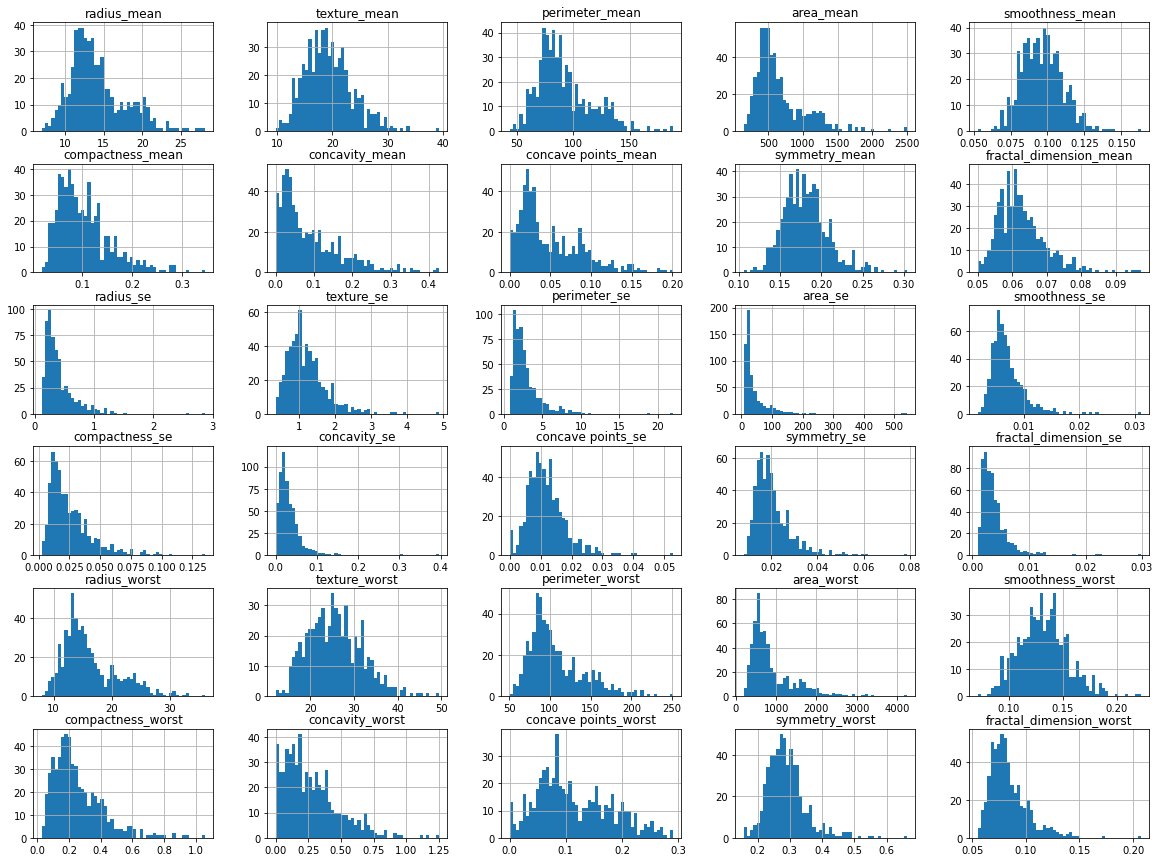

In [16]:
data.hist(bins=50, figsize=(20,15))
plt.show()

The attributes appear to have different scales. We will discuss this later in this notebook when we explore feature scaling.

In general, we prefer to work with data normally distributed, since more reliable predictions are made if the predictors and the target variable are normally distributed. In Machine Learning, data satisfying normal distribution is beneficial for model building. It makes math easier. 

However, not all distributions are symmetrical and there can be different reasons.

 1. The size of the data sample is too small. Increasing the size of the sample can lead to a shape closer to the gaussian distribution.
 
 2. The presence of extreme values (or outliers) at the edge of the distribution (e.g. measurement error, missing data, data corruption, etc.). In such cases, the extreme values should be identified and removed in order to make the distribution more Gaussian. 
 
 3. (long tails) We might have non-normal data that are skewed, which means that some histograms are tail heavy.

In order to get more bell-shaped distributions we can increase the sample size, removing outliers or transforming the features.

**Note**. Normality is an assumption for the ML models. It is not mandatory that data should always follow normality. ML models work also in the case of non-normally distributed data also. Models like decision tree, gradient boosting tree, don’t assume any normality and work on raw data as well. Also, linear regression is statistically effective if only the model errors are Gaussian, not exactly the entire dataset.

#### Sample size too small

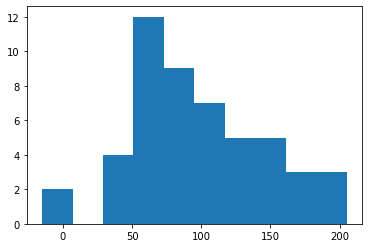

In [55]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
seed(1)
datest = 50 * randn(50) + 100
pyplot.hist(datest)
pyplot.show()

#### Presence of outliers

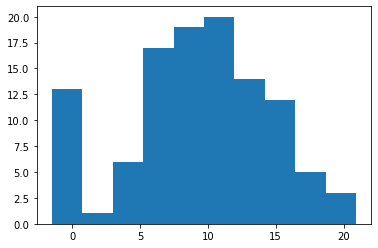

In [18]:
from numpy.random import seed
from numpy.random import randn
from numpy import zeros
from numpy import append
from matplotlib import pyplot
seed(1)
datest = 5 * randn(100) + 10
datest = append(datest, zeros(10))
pyplot.hist(datest)
pyplot.show()

#### Skewed data

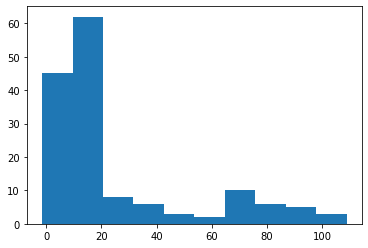

In [19]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot
seed(1)
datest = 5 * randn(100) + 10
tail = 10 + (rand(50) * 100)
datest = append(datest, tail)
pyplot.hist(datest)
pyplot.show()

#### A common issue associated with dataset is skewness

Data including features with asymmetric distributions.

Types of skewness

<img src="PS1/Img/kaggle_image_skewed_data.jpg"/>

From https://www.kaggle.com/getting-started/110134

A data transformation may be used to reduce skewness. A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution. 

In general different trasnformations can be tested:

To reduce right skewness
- *Log transformation (log base e of x (ln x), or x to log base 2 of x)*
- *Square Root Transformation (sqrt(x))*
- *Cube root (x^(1/3))*
- *Reciprocal Transformation (from x to 1/x)*

To reduce left skewness
- *Squares (x²)*
- *Cubes (x³)*
- *High powers*

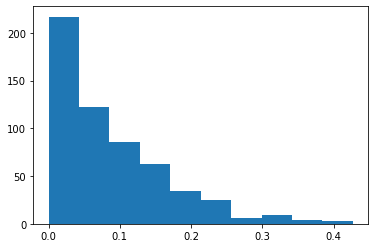

In [20]:
pyplot.hist((data['concavity_mean']))
pyplot.show()

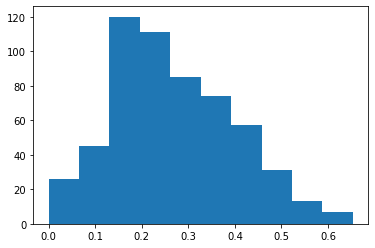

In [21]:
pyplot.hist(np.sqrt((data['concavity_mean'])))
pyplot.show()

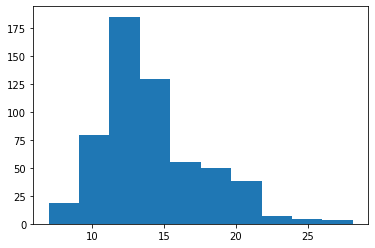

In [22]:
pyplot.hist((data['radius_mean']))
pyplot.show()

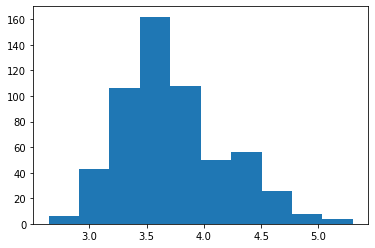

In [23]:
pyplot.hist(np.sqrt((data['radius_mean'])))
pyplot.show()

In [24]:
features = data.drop(['diagnosis'], axis = 1) 
sqrt_features = features.copy()
for feature_name in sqrt_features.columns:
    sqrt_features[feature_name] = np.sqrt(sqrt_features[feature_name]) 
features = pd.DataFrame(sqrt_features)

**What if the response variable is skewed? What is the possible consequence?**

### Scatter plots

To better understand the relationships between attributes we can use scatter plots. 

*It tells us how much one variable is affected by another.*

To this end, the *DataFrame.plot* method can be used like this:

<AxesSubplot:xlabel='perimeter_mean', ylabel='area_mean'>

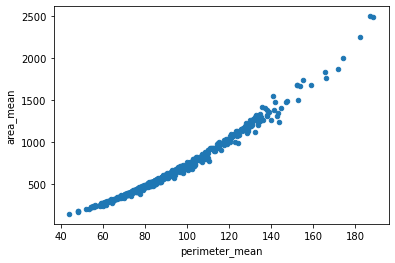

In [25]:
data.plot(kind="scatter", x="perimeter_mean", y="area_mean")

We can also use the 'alpha' parameter to make the points transparent in order to better identify high-density areas. 

<AxesSubplot:xlabel='perimeter_mean', ylabel='area_mean'>

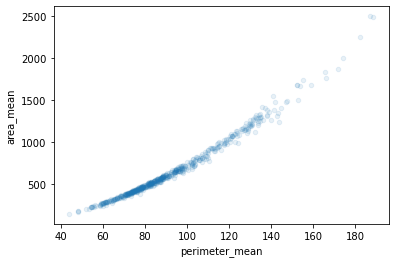

In [26]:
data.plot(kind="scatter", x="perimeter_mean", y="area_mean", alpha=0.1)

When inspecting the data it is important to include the information about the target variable in order
to screen for potential patterns. 

Coloring the the dots based on the diagnosis is an easy way to include it here. 

To do this, we will consider another graphical toolbox available in Python, which is **Seaborn**.

*Seaborn* is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

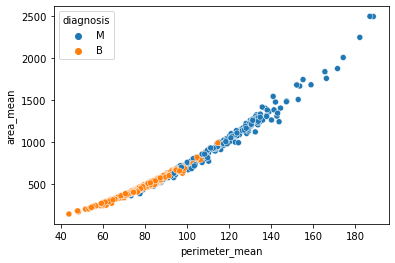

In [27]:
import seaborn as sns
g = sns.scatterplot(x="perimeter_mean", y="area_mean", hue="diagnosis", data=data);

### Correlation plots

Since the dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the *corr()* method:

In [28]:
corr_matrix = data.corr()

Now let’s look at how much each attribute correlates with the mean of the radius:

In [29]:
corr_matrix["radius_mean"].sort_values(ascending=False)

radius_mean                1.000000
perimeter_mean             0.997855
area_mean                  0.987357
radius_worst               0.969539
perimeter_worst            0.965137
area_worst                 0.941082
concave points_mean        0.822529
concave points_worst       0.744214
area_se                    0.735864
radius_se                  0.679090
concavity_mean             0.676764
perimeter_se               0.674172
concavity_worst            0.526911
compactness_mean           0.506124
compactness_worst          0.413463
concave points_se          0.376169
texture_mean               0.323782
texture_worst              0.297008
compactness_se             0.206000
concavity_se               0.194204
smoothness_mean            0.170581
symmetry_worst             0.163953
symmetry_mean              0.147741
smoothness_worst           0.119616
fractal_dimension_worst    0.007066
fractal_dimension_se      -0.042641
texture_se                -0.097317
symmetry_se               -0

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the *radius mean value* tends to go up when the *perimeter mean values* goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the *radius mean value* and the *fractal dimension mean value*.

We can visualize the correlation values for a given variable by using a bar plot.

<AxesSubplot:>

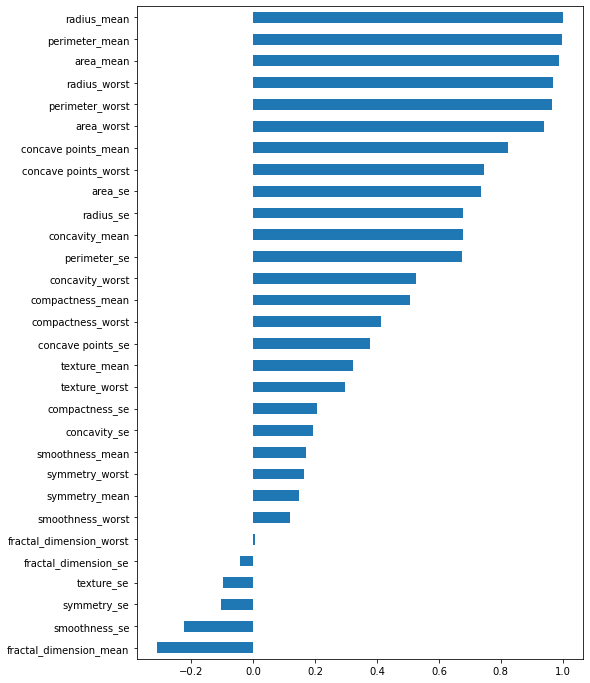

In [30]:
plt.figure(figsize=(8, 12))
data.corr()['radius_mean'].sort_values().plot(kind='barh')

Below we will use Seaborn to create a heat map of the correlations between the means.

In [31]:
# We can use boolean masks to select all column names matching a criteria (i.e. last 5 characters are equal to '_mean')
features_mean = data.columns[np.array([i[-5:] == '_mean' for i in data.columns])] 
print(features_mean)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')


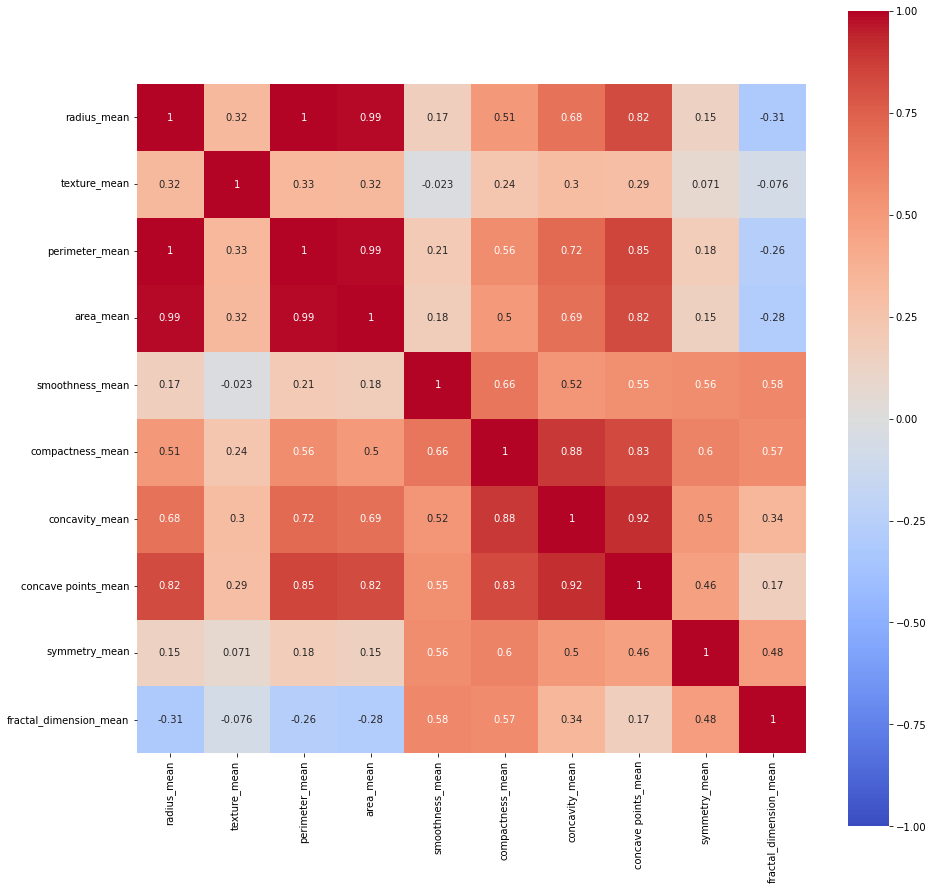

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.show()

Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function, which plots every numerical attribute against every other numerical attribute. 

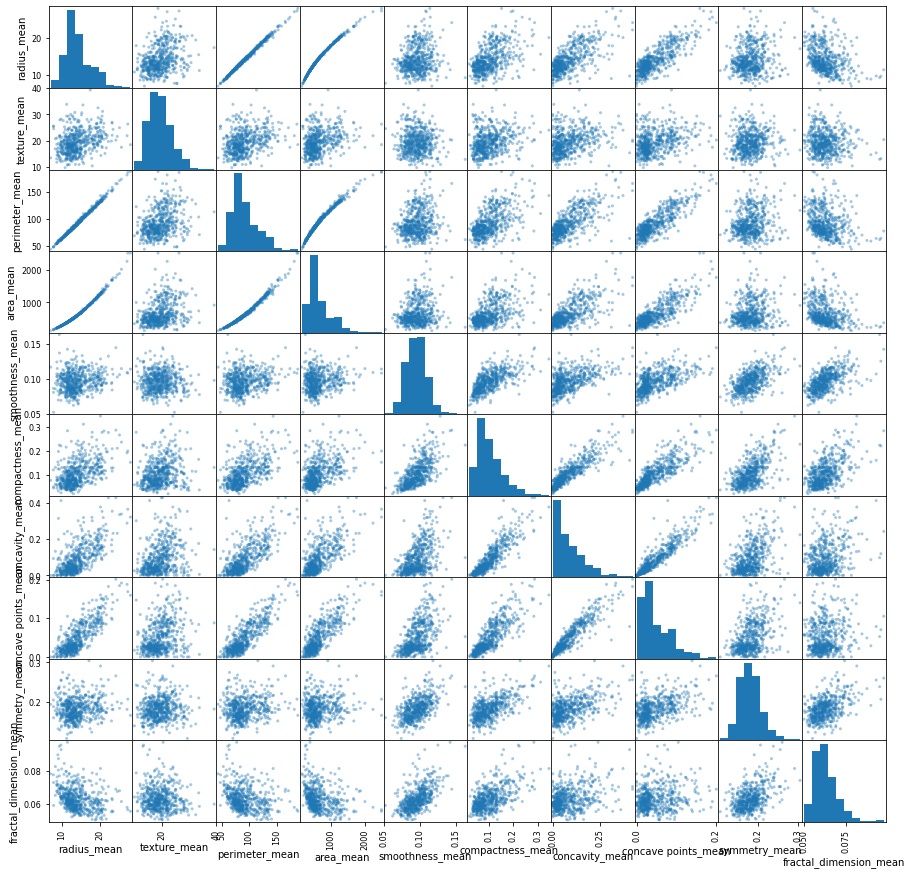

In [33]:
sm = pd.plotting.scatter_matrix(data[features_mean], alpha=0.4, figsize=((15,15)));
plt.show()

Again, we can add the information about the *diagnosis* to visually observe if there is a correlation between the features/predictors and the target variable.

0       red
1       red
2       red
3       red
4       red
       ... 
564     red
565     red
566     red
567     red
568    blue
Name: diagnosis, Length: 569, dtype: object


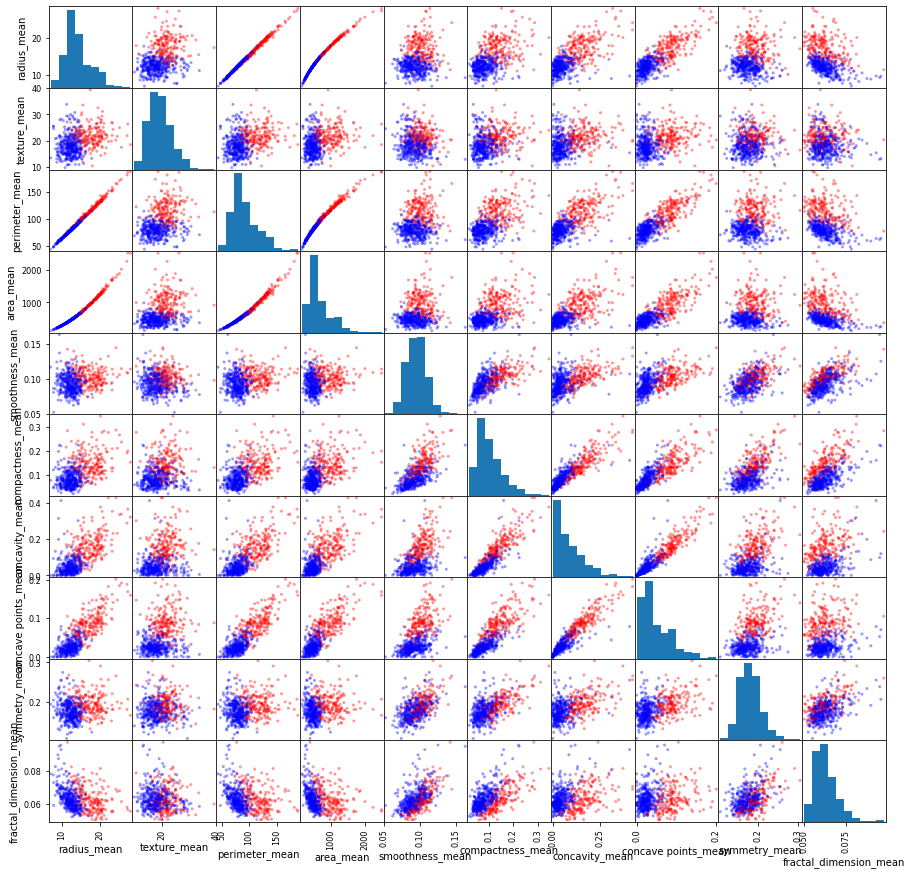

In [34]:
color_dic = {'M':'red', 'B':'blue'}
colors = data['diagnosis'].map(lambda x: color_dic.get(x))
print(colors)
sm = pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

About using *map()* and *lambda*

*map()* iterates over the list of items (from a sequence) and apply lambda function on each item element. 

*lambda* is a small anonymous function

**Why do we need to visualize/check the correlation between the variables?**

Correlation can be an important tool for feature engineering in building machine learning models.

* Predictors which are uncorrelated with the objective variable are probably good candidates to trim from the model (shoe size is not a useful predictor for salary). 
* If two predictors are strongly correlated to each other, then we only need to use one of them (in predicting salary, there is no need to use both age in years, and age in months). 

Taking these steps means that the resulting model will be simpler and therefore easier to interpret.

However, the correlation coefficient only measures linear correlations. What if there is a non-linear relationship between two variables? 

### Distribution plots

We can also use various Seaborn functions in order to check if the malignant or benign tumors cells have different values by plotting the distribution of the features with respect to each diagnosis.

Here we combine seaborn histplot() and kdeplot() functions to check the distribution of each feature for malignant and bening tumours. 

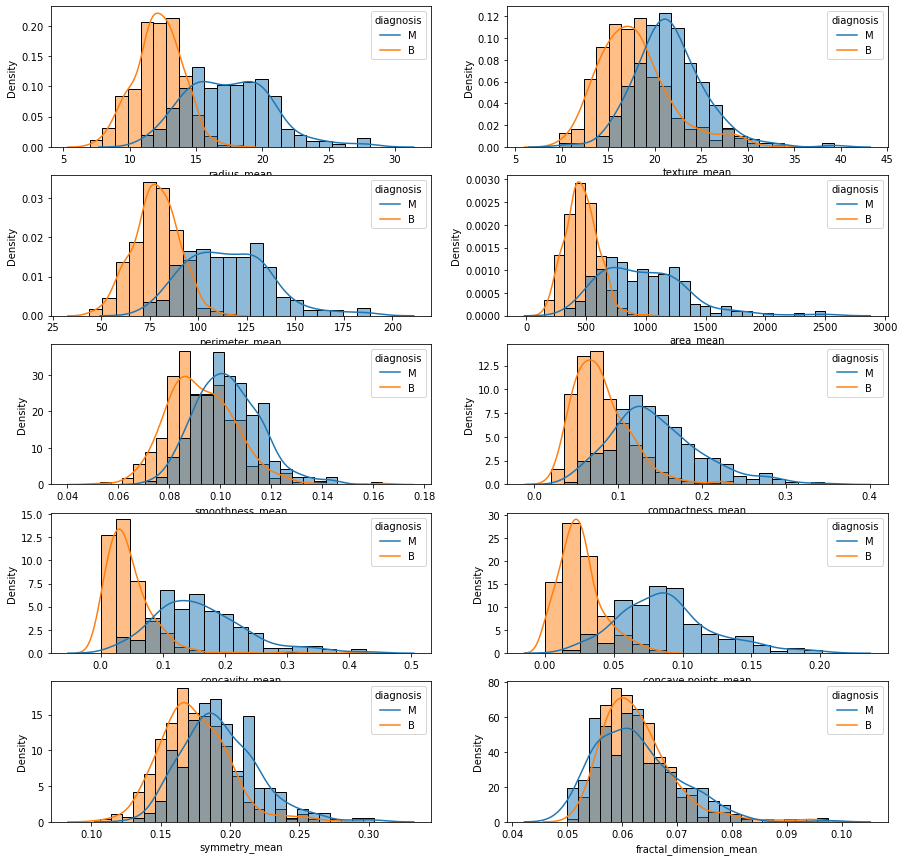

In [36]:
bins = 12
plt.figure(figsize=(15,15))

for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    plt.subplot(rows, 2, i+1)
    sns.histplot(data, x = feature, hue='diagnosis', common_norm = False, stat='density')
    #sns.rugplot(x = data[feature], hue=data['diagnosis'])
    sns.kdeplot(x = data[feature], hue=data['diagnosis'], common_norm = False)

### Box plots
Box plots another useful technique to review the distribution of each feature’s distribution. 
The following are the characteristics of this technique

* It summarizes the distribution of each attribute.
* It draws a line for the middle value i.e. for median.
* It draws a box around the 25% and 75% (or the lower and upper quantile).

It also draws whiskers which will give us an idea about the spread of the data.

The height of the boxplot is also called the Inter Quartile Range (IQR), the points that lie outside the whiskers, that is, (1.5 x IQR) in both directions are generally considered as outliers. 

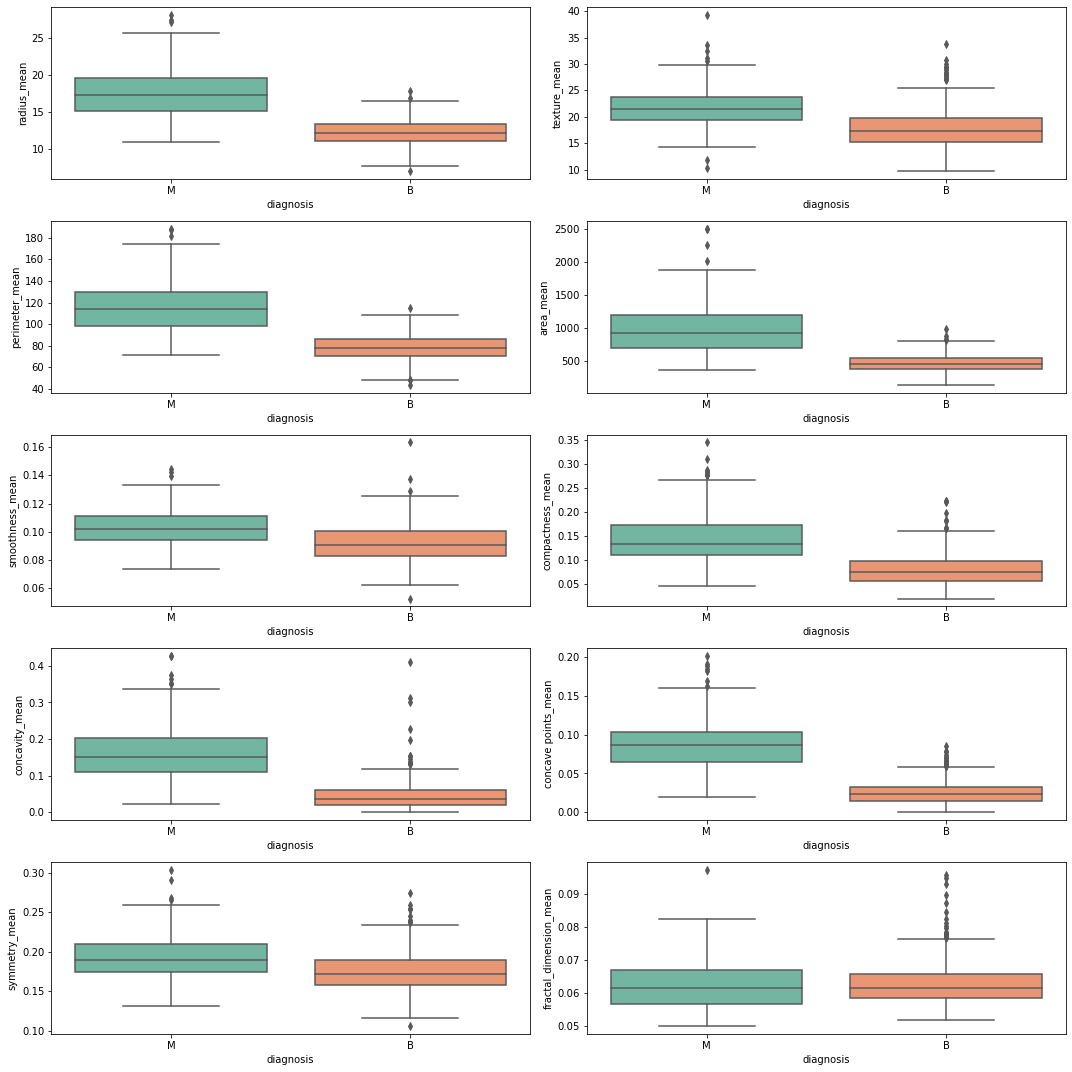

In [37]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    plt.subplot(rows, 2, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=data, palette="Set2")
plt.tight_layout()
plt.show()

<a id="section_4"></a>
## 4. Splitting the dataset into training and test sets

To train a model we give it training examples. These examples form the training set. 

Training yields a model fit which maximizes performance on the training set, but then how do we measure or estimate its expected performance on unseen data? 

In order to be able to answer to this question we need to have a test data set.

A test set is a set of samples that the learning algorithm has never seen before.

We can use the test set to measure the generalization performance of the trained model.

Ideally, we would like to have de-novo data. However, for the sake of convenience we can simply extract a 'holdout'/test set from the data we have to serve as an approximation for new data. 

The simplest strategy is to divide the data set into:

* **training set** — a subset to train a model.
* **test set** — a subset to test the trained model.

Typically we pick up the 20-30% of the dataset as test set, and use the remaining 70-80% as training set.

**Important note**. If a variable containing missing values needs to be imputed, then the imputation should be applied after splitting the data into training and test sets. 

In [38]:
# first, we split the variables of the data set in predictors (X) and target (y) 
X = data.loc[:, features_mean] # note we use only the 'mean' features as predictors
y = data.loc[:,'diagnosis']

Now, we can use the function *'train_test_split'* for splitting 

In [39]:
# second, we split the data set into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

We can chek the dimensions of the training and testing sets. 

In [40]:
print(X_train.shape)
print(X_test.shape)

(398, 10)
(171, 10)


In [41]:
type(X_train)

pandas.core.frame.DataFrame

Text(0.5, 1.0, "Histogram with 'auto' bins")

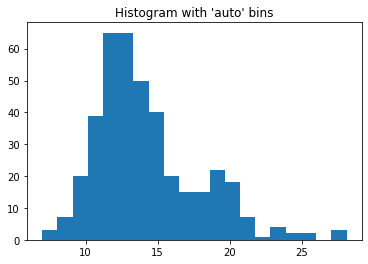

In [42]:
plt.hist(X_train['radius_mean'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

<a id="section_5"></a>
## 5. Feature scaling

One of the most important pre-processing steps you need to apply to your data is feature scaling. 

With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. 

The two most common ways to get all attributes to have the same scale are *min-max scaling* and *standardization*.

* Min-max scaling (*sklearn.preprocessing.MinMaxScaler*): values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. 

* Standardization (*sklearn.preprocessing.StandardScaler*): first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. 

**The Big Question – Normalize or Standardize?**

- *Normalization* is good to use when you know that the distribution of your data does not follow a Gaussian distribution. 

- *Standardization* can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., some neural networks expect input values to be bounded from 0 to 1). So, even if you have outliers in your data, they will not be affected by standardization.

However, the choice of using normalization or standardization will also depend on the problem and the machine learning algorithm we are focusing on. 

Before scaling the data, let’s create a copy so you can play with it without harming the training and testing sets

In [49]:
X_ctrain = X_train.copy()
X_ctest = X_test.copy()

Now, let's use *StandardScaler* to standardize our numerical features/predictors by avoiding data leakage.

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_features = sc.fit_transform(X_ctrain[features_mean].values)

The *StandardScaler* will produce as data structure a multidimensional array or, simply, a matrix.

In [51]:
type(scaled_features)

numpy.ndarray

So, we need replace the unscaled columns of the object *"X_ctrain"* with the new scaled variables generated by *StandardScaler*.

In [52]:
X_ctrain[features_mean] = scaled_features

We can observe that now the mean is close to 0, while the standard deviation is close to 1. 

In [53]:
X_ctrain.describe().iloc[1:3,:]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
mean,1.919179e-16,7.051869e-16,8.926416e-17,-1.115802e-17,-3.749095e-16,1.696019e-16,7.141133e-17,-1.115802e-16,1.467280e-16,3.436670e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00


So, now the numeric variables of the training set have been standardized. 

**What about the testing set?**

We used the function *fit_transform*, which means that we first estimate (**fit**) the parameters $\mu$ and $\sigma$ by using the training set and then we use apply the following transformation.

\begin{equation*}
x' = \frac{x-\mu}{\sigma}
\end{equation*}

Then, we have to apply the same transformation to the test set withouth estimating again the the parameters $\mu$ and $\sigma$. 

In [54]:
X_ctest[features_mean] = sc.transform(X_ctest[features_mean])

/Users/vittfo/anaconda3/envs/rivertest/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<a id="section_6"></a>
## 6. Train and evaluate the models

With basic exploration and data processing out of the way, we are now ready to select and train a Machine Learning model.

### Training and Evaluating on the Training Set

Thanks to all these previous steps, the process of training models is going to be fairly straight-forward. 

Let’s first train a Gaussian Naive Bayes classifier.

In [48]:
from sklearn.naive_bayes import GaussianNB

nb_cls = GaussianNB()
nb_cls = nb_cls.fit(X_ctrain, y_train)

We now have a GNB model. Let’s test it on a few instances from the training set:

In [49]:
some_data = X_ctrain.iloc[:20]
some_labels = y_train.iloc[:20]
comp = pd.DataFrame({'Predicted': nb_cls.predict(some_data),'Observed': list(some_labels)})
print(comp)

   Predicted Observed
0          B        B
1          B        B
2          B        B
3          M        M
4          B        B
5          B        B
6          B        B
7          B        B
8          B        M
9          M        M
10         B        B
11         B        B
12         B        M
13         B        B
14         B        B
15         B        B
16         B        B
17         M        M
18         B        B
19         B        B


It works! Although not all predictions are accurate ...

*Rows number 8 and 12*

### Evaluation metrics

To get an idea of the overall performance we use **performance evaluation metrics**.

For instance, we can use the classification accuracy:

\begin{equation*}
accuracy = \frac{\textit{number of correct predictions}}{\textit{total number of predictions}}
\end{equation*}

In [50]:
from sklearn import metrics

result = nb_cls.predict(X_ctrain)
print(metrics.accuracy_score(y_train, result))

0.9221105527638191


So we are correctly classifying 92% of tumours, not bad ...

**WAIT! Are we forgetting something?**

We need to evaluate the *accuracy* on the test set (corresponding to the 'unseen' data).

In [51]:
accuracy = metrics.accuracy_score(y_test, nb_cls.predict(X_ctest))
print(accuracy)

0.9064327485380117


As can be observed, the value of the accuracy decreased on the test set. 

This is usually expected, since the amount of data is limited and the training data might not be completely representative of the test data. 

### Try out different ML methods

First, import different ML algorithms from the module *sklearn*

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Second, instantiate a classifier object for each ML algorithm.

In [53]:
classifier_1 = LogisticRegression(random_state = 0, solver = 'lbfgs', penalty = 'none')
classifier_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_3 = SVC(kernel = 'linear', random_state = 0)
classifier_4 = SVC(kernel = 'rbf', random_state = 0)
classifier_5 = GaussianNB()
classifier_6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# create a list of classifiers
list_cls = [classifier_1, classifier_2, classifier_3, classifier_4, classifier_5, classifier_6, classifier_7]

Third, define a function in that implements training and prediction performance evaluation.

In [54]:
def evaluate(classifier):
    classifier.fit(X_ctrain, y_train)
    y_pred = classifier.predict(X_ctest)
    acc_val = metrics.accuracy_score(y_test, y_pred)
    return acc_val

In [55]:
acc_results = []
for cls in list_cls:
    acc_results.append(evaluate(cls))
#
models = pd.DataFrame({'Model Name':["Logistic Regression",
                                     "KNN","SVC Linear","SVC RBF",
                                     "Naive Bayes","Decision Tree",
                                     "Random Forest"],\
                        'Accuracy':acc_results})
models

,Model Name,Accuracy
0,Logistic Regression,0.941520
1,KNN,0.906433
2,SVC Linear,0.929825
3,SVC RBF,0.947368
4,Naive Bayes,0.906433
5,Decision Tree,0.912281
6,Random Forest,0.929825


<a id="section_7"></a>
## 7. Fine-tune promising models


Let’s suppose that we now have a potential list of promising models. 

As the next step, we need to fine-tune them.

Before looking at a few ways we can do that, we need to explain the difference between *parameters* and *hyper-parameters* of ML algorithms. 

A **model parameter** is a configuration variable that is internal to the model and whose value can be estimated from data i.e. by training.

Some examples of model parameters include:

* The weights in an artificial neural network.
* The support vectors in a support vector machine.
* The coefficients in a linear regression or logistic regression.

A **model hyperparameter** is a configuration that is external to the model and whose value cannot be estimated from data and are usually defined by the user.

Some examples of model hyperparameters include:

* The learning rate for training a neural network.
* The number of trees in a random forest-based classifier.
* The k in k-nearest neighbors.


Two alternative strategies for tuning the **model hyperparameters**

#### Grid Search

* Define a set of possible combinations between two (or more) hyperparameters.
* Test each combination of hyperparameter values. 


Let's consider the Random Forest-based classifier (RFC). https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Two important hyper-parameters of RFs are the number of trees in the forest (*n_estimators*) and the number of features considered for splitting a node (*max_features*).

In [56]:
from sklearn.model_selection import GridSearchCV

grid_param_1 = [3, 10, 30]
grid_param_2 = [2, 3, 4]

param_grid = {'n_estimators': grid_param_1, 'max_features': grid_param_2}
forest_cls = RandomForestClassifier()

grid_search = GridSearchCV(forest_cls, param_grid, cv=5, 
                           scoring='accuracy', return_train_score=True)

grid_search = grid_search.fit(X_ctrain, y_train)

This param_grid tells Scikit-Learn to first evaluate all 3 × 3 = 9 combinations of n_estimators and max_features hyperparameter values specified in the *grid*.

We can retrieve the mean and the standard deviation obtained from the accuracy values calculated on the test sets.

In [57]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8918670886075949 {'max_features': 2, 'n_estimators': 3}
0.9297151898734178 {'max_features': 2, 'n_estimators': 10}
0.9423101265822785 {'max_features': 2, 'n_estimators': 30}
0.9170886075949367 {'max_features': 3, 'n_estimators': 3}
0.9373101265822784 {'max_features': 3, 'n_estimators': 10}
0.9247151898734177 {'max_features': 3, 'n_estimators': 30}
0.9270569620253164 {'max_features': 4, 'n_estimators': 3}
0.9246518987341773 {'max_features': 4, 'n_estimators': 10}
0.9373101265822784 {'max_features': 4, 'n_estimators': 30}


We can build a graphic showing how the accuracy is improved when trying different hyper-parameter combinations.

In [58]:
# Get Test Scores Mean and std for each grid search
scores_mean = grid_search.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean).reshape(3,3)

scores_sd = grid_search.cv_results_['std_test_score']
scores_sd = np.array(scores_sd).reshape(3,3)

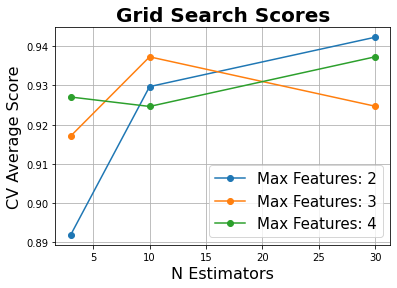

In [59]:
name_param_1 = 'N Estimators'
name_param_2 = 'Max Features'

# Plot Grid search scores
_, ax = plt.subplots(1,1)

# Param1 is the X-axis, Param 2 is represented as a different curve (color line)
for idx, val in enumerate(grid_param_2):
    ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
ax.set_xlabel(name_param_1, fontsize=16)
ax.set_ylabel('CV Average Score', fontsize=16)
ax.legend(loc="best", fontsize=15)
ax.grid('on')

We can also access the best parameters and the best model directly from the search result.

In [60]:
print(grid_search.best_params_)

{'max_features': 2, 'n_estimators': 30}


### Randomized search

When the hyperparameter search space is large, it is often preferable to use *RandomizedSearchCV* instead.

Instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. 

<a id="section_8"></a>
## 8. Evaluate the best selected model on the test set

After testing different ML algorithms combined with different set of hyper-parameters, we hope to find a system that performs sufficiently well. 

Once we found our *'final'* model, we need to evaluate it on the **test set**. 

In [61]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_ctest)
final_accuracy = metrics.accuracy_score(y_test, final_predictions) 
print(final_accuracy)

0.9298245614035088


## Independent work

### Read the Book Chapter 2

### * Exercises

Using the breast cancer wisconsin (diagnostic) data set:

### 0. Test that everything is working properly
Run/test this Jupyter notebook file on your computer desktop.

### 1. Feature importance
ML methods like Random Forest-based classifier can indicate the relative importance of each attribute (feature) for making accurate predictions. Display these importance scores next to their corresponding attribute names.

### 2. Support Vector Machine classifier
Try a Support Vector Machine classifier (sklearn.svm.SVC), with various hyper‐parameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best SVC predictor perform? 

Plot the results using seaborn.lineplot (Hint: seaborn is very sensitive to input data type, use the .astype method to convert inputs to floating point values (dtype = 'float') if you run into problems). 

(Some confusion might arise from which data set to use: X/X_train/Xc_train)

### 3. Randomized parameter search
Try replacingGridSearchCV with RandomizedSearchCV for the Support Vector machine from the previous exercise or the RandomForestClassifier from section 7. 

(Hint: use scipy.stats uniform, loguniform or randint distributions for the parameters). 

Visualize the results using seaborn (e.g. a scatterplot).

### 4. Indian liver patient dataset
i) Download another data set (https://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29) and import it into python. 

ii) Process the data (cleaning, splitting and scaling). You may ignore the gender of the patients. 

iii) Predict disease status using any classifier you prefer. 

iv) Report the accuracy of your predictions. Did you notice any issues. 

In [2]:
## a little help...

# Load data (not necessary if you ran the full notebook)
import pandas as pd
import numpy as np
data = pd.read_csv('PS1/data.csv')

# you can use boolean masks to select all column names matching a criteria
features_mean = data.columns[np.array([i[-5:] == '_mean' for i in data.columns])] 

# first, we split the variables of the data set in predictors (X) and target (y) 
X = data.loc[:, features_mean] # note we use only the 'mean' features as predictors
y = data.loc[:,'diagnosis']

# second, we split the data set into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_ctrain = X_train.copy()

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_features = sc.fit_transform(X_ctrain[features_mean].values)
X_ctrain[features_mean] = scaled_features

In [9]:
# Use CV to fit RF (not necessary if you ran the full notebook)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_param_1 = [3, 10, 30]
grid_param_2 = [2, 3, 4]

param_grid = {'n_estimators': grid_param_1, 'max_features': grid_param_2}
forest_cls = RandomForestClassifier()

grid_search = GridSearchCV(forest_cls, param_grid, cv=5, #iid = False,
                           scoring='accuracy', return_train_score=True)

grid_search.fit(X_ctrain, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='accuracy')